In [1]:
import geopandas
import pandas
import starepandas
import pystare
import shapely
import matplotlib.pyplot as plt

In [2]:
starepandas.__version__

'0.5.14+0.g16b6d3d.dirty'

In [3]:
cities = {'name': ['midway', 'Fiji', 'Baker', 'honolulu'],
          'lat': [28.2, -17.8,  0.2, 21.3282956], 
          'lon': [-177.35, 178.1, -176.7, -157.9]}
                   
cities = starepandas.STAREDataFrame(cities)
sids = starepandas.sids_from_xy(cities.lon, cities.lat, resolution=1)
cities.set_sids(sids, inplace=True)
trixels = cities.make_trixels(wrap_lon=False)
cities.set_trixels(trixels, inplace=True)

<AxesSubplot:>

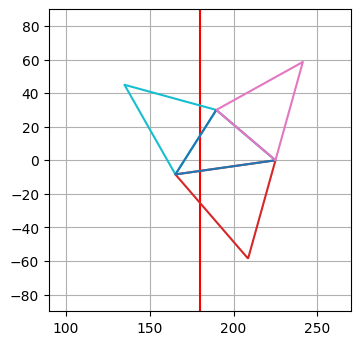

In [4]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)

antimeridian = shapely.geometry.LineString([(180,-90), (180,90)])

ax.plot(*antimeridian.xy, color='red')
ax.set_ylim(-90,90)
ax.set_xlim(90,270)

cities.plot(ax=ax, column='name')

## Multipolygon

In [5]:
combined = starepandas.STAREDataFrame(sids=[sids, sids])
trixels = combined.make_trixels(wrap_lon=False)
combined.set_trixels(trixels, inplace=True)

# Algorithm

In [6]:
bbox = shapely.geometry.Polygon([(-180, -90), (180, -90), (180, 90), (-180, 90)])

In [7]:
trixels = geopandas.GeoSeries(combined[combined._trixel_column_name])

In [8]:
def split(trixels):
    bbox = shapely.geometry.Polygon([(-180, -90), (180, -90), (180, 90), (-180, 90)])

    trixels = geopandas.GeoSeries(trixels)

    inside = trixels.explode(index_parts=True).reset_index(drop=True)
    inside = inside.intersection(bbox)
    inside = geopandas.tools.collect(inside)

    outside = trixels.explode(index_parts=True).reset_index(drop=True)
    outside = outside.difference(bbox)
    outside = outside.apply(lambda x: shapely.affinity.translate(x, xoff=-360))
    outside = geopandas.tools.collect(outside)

    split = inside.union(outside)
    return split

# Usage

<AxesSubplot:>

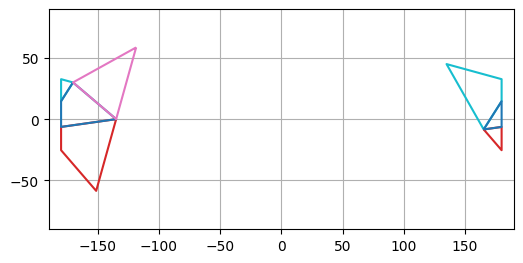

In [9]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)

ax.set_ylim(-90,90)
ax.set_xlim(-190,190)

cities.split_antimeridian(inplace=True)

cities.plot(ax=ax, column='name')

<AxesSubplot:>

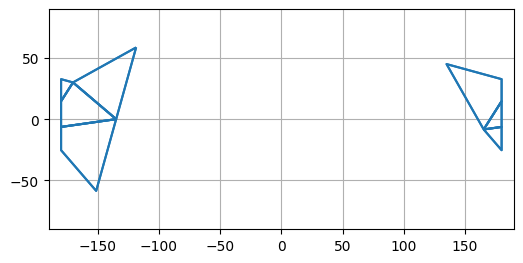

In [10]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)

ax.set_ylim(-90, 90)
ax.set_xlim(-190, 190)

combined.split_antimeridian(inplace=True)

combined.plot(ax=ax)

In [11]:
cities.trixels[0].geoms[1].exterior.xy

(array('d', [-170.26439000686852, -180.0, -180.0, -170.26439000686852]),
 array('d', [29.999999603043193, 14.653891165651418, 32.667991191813314, 29.999999603043193]))

In [19]:
cities = {'name': ['a'],
          'lat': [20], 
          'lon': [180]}

cities = starepandas.STAREDataFrame(cities)
sids = starepandas.sids_from_xy(cities.lon, cities.lat, resolution=1)
cities.set_sids(sids, inplace=True)
trixels = cities.make_trixels(wrap_lon=True, wrap_thresh=270)
cities.set_trixels(trixels, inplace=True)
cities.split_antimeridian(inplace=True)

<AxesSubplot:>

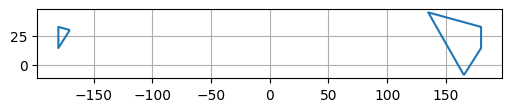

In [20]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)

antimeridian = shapely.geometry.LineString([(180,-90), (180,90)])

#ax.plot(*antimeridian.xy, color='red')
#ax.set_ylim(-90,90)
#ax.set_xlim(90,270)

cities.plot(ax=ax, column='name')

In [14]:
vs = starepandas.to_vertices(sids, wrap_lon=False, wrap_thresh=270)
vs

(array([29.9999996 , 44.99999931, -8.42105871]),
 array([189.73560999, 135.        , 165.36119346]),
 array([23.94735411]),
 array([165.36119325]))